# **Generative Flow Field Animation in Google Colab**

## **About the Animation**
This animation creates **moving geometric shapes** (circles, triangles, squares) that follow a **Perlin noise-driven flow field**. The shapes change position smoothly, creating a **natural, organic motion**.

## **How to Run in Colab**
1. **Copy & paste the code** into a Colab cell.
2. **Run the cell**, and it will generate and display a **GIF output** directly in the notebook.
3. The animation updates **frame-by-frame**, ensuring smooth transitions between shapes and also you can able to see the last frame

## **Concepts Used**
- **Flow Field**
 * Uses Perlin noise to create structured, smooth movement.
- **Geometric Shapes**
 * Circles, triangles, and squares animated dynamically.
- **Noise & Randomness**
 * Ensures the motion feels natural instead of chaotic.
- **GIF Output**
  * Directly displayed in the Colab notebook.


In [ ]:
!pip install noise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp311-cp311-linux_x86_64.whl size=56274 sha256=5e36c073274c9db9e11c757fdd627319d90a65fa12b572c4a1ff3ab5f6aa68e9
  Stored in directory: /root/.cache/pip/wheels/39/25/2e/af6d1bcc91a8f99af0f651f8718b9ab999720a21c6d4149091
Successfully built noise


Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


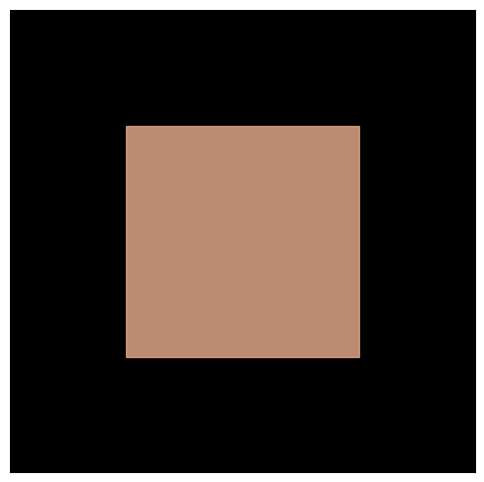

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import noise
import random
import cv2
import imageio
from matplotlib.patches import Polygon, Circle
from moviepy.editor import VideoClip, ImageSequenceClip

def perlin_noise(x, y, scale=100.0, seed=42):
    return noise.pnoise2(x / scale, y / scale, octaves=6, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=seed)

def generate_shapes(frame):
    shapes = []
    t = np.linspace(0, 2 * np.pi, 100)
    colors = [np.random.rand(3,) for _ in range(3)]
    if frame % 300 < 100:
        x = np.cos(t)
        y = np.sin(t)
        shapes.append((x, y, 'circle', colors[0]))
    elif frame % 300 < 200:
        x = np.array([-0.5, 0.5, 0])
        y = np.array([-0.5, -0.5, 0.5])
        shapes.append((x, y, 'triangle', colors[1]))
    else:
        x = np.array([-0.5, 0.5, 0.5, -0.5])
        y = np.array([-0.5, -0.5, 0.5, 0.5])
        shapes.append((x, y, 'square', colors[2]))
    return shapes

def update(frame, ax):
    ax.clear()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')

    shapes = generate_shapes(frame)
    for x, y, shape_type, color in shapes:
        if shape_type == 'circle':
            patch = Circle((0, 0), 0.5, color=color, alpha=0.8)
            ax.add_patch(patch)
        else:
            ax.fill(x, y, color=color, alpha=0.8)
    return ax

def create_video():
    fig, ax = plt.subplots(figsize=(6, 6))
    frames = []

    for frame in range(300):  # Generate 300 frames
        update(frame, ax)
        fig.canvas.draw()
        frame_img = np.array(fig.canvas.renderer.buffer_rgba())
        frames.append(frame_img)

    clip = ImageSequenceClip(frames, fps=10)
    clip.write_videofile("output.mp4", fps=10, codec="libx264", bitrate="5000k")

    imageio.mimsave("output.gif", frames, fps=10)

def create_art():
    create_video()

create_art()

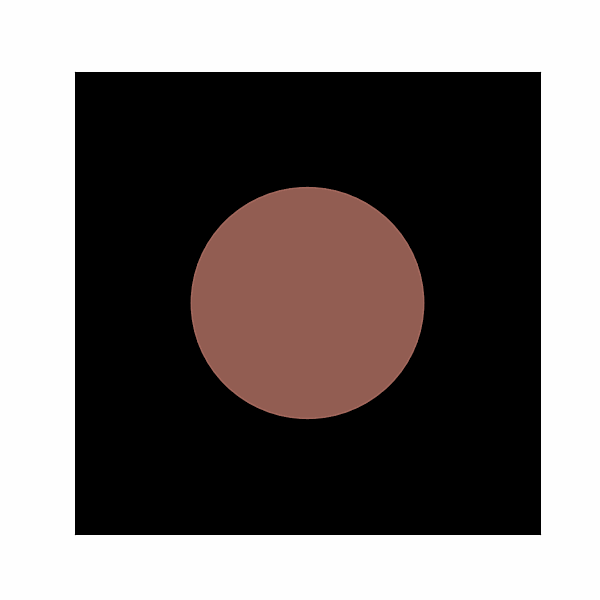

In [ ]:
from IPython.display import display, Image
display(Image(filename="output.gif"))

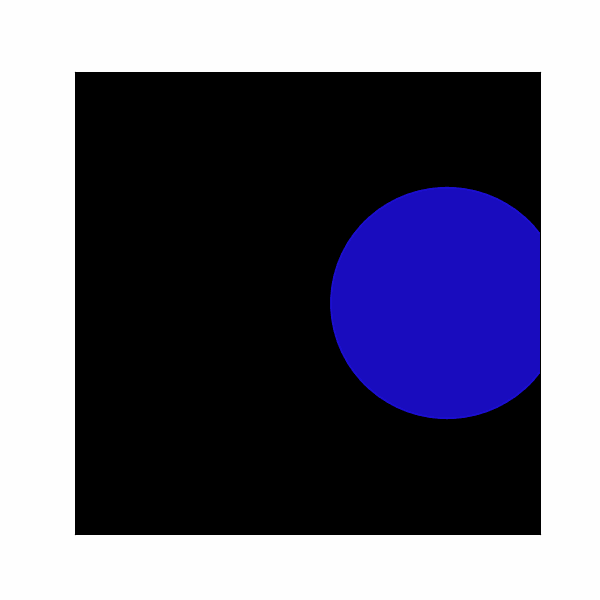

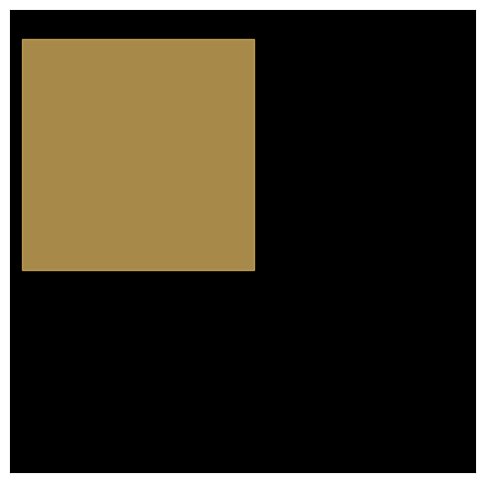

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import noise
import random
import cv2
import imageio
from matplotlib.patches import Polygon, Circle
from moviepy.editor import VideoClip, ImageSequenceClip

def perlin_noise(x, y, scale=10.0, seed=42):
    return noise.pnoise2(x / scale, y / scale, octaves=4, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=seed)

def generate_flow_field(frame, num_points=10):
    """Generate a flow field using Perlin noise for structured movement."""
    x_vals, y_vals = [], []
    for i in range(num_points):
        x = np.cos(frame * 0.05 + i * 0.1) * 0.6 + perlin_noise(i, frame, scale=15) * 0.3
        y = np.sin(frame * 0.05 + i * 0.1) * 0.6 + perlin_noise(frame, i, scale=15) * 0.3
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals

def generate_shapes(frame):
    shapes = []
    t = np.linspace(0, 2 * np.pi, 100)
    colors = [np.random.rand(3,) for _ in range(3)]
    x_vals, y_vals = generate_flow_field(frame)
    if frame % 300 < 100:
        shapes.append((x_vals, y_vals, 'circle', colors[0]))
    elif frame % 300 < 200:
        x = np.array([-0.5, 0.5, 0]) + x_vals[0]
        y = np.array([-0.5, -0.5, 0.5]) + y_vals[0]
        shapes.append((x, y, 'triangle', colors[1]))
    else:
        x = np.array([-0.5, 0.5, 0.5, -0.5]) + x_vals[1]
        y = np.array([-0.5, -0.5, 0.5, 0.5]) + y_vals[1]
        shapes.append((x, y, 'square', colors[2]))
    return shapes

def update(frame, ax):
    ax.clear()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')

    shapes = generate_shapes(frame)
    for x, y, shape_type, color in shapes:
        if shape_type == 'circle':
            patch = Circle((x[0], y[0]), 0.5, color=color, alpha=0.8)
            ax.add_patch(patch)
        else:
            ax.fill(x, y, color=color, alpha=0.8)
    return ax

def create_video():
    fig, ax = plt.subplots(figsize=(6, 6))
    frames = []

    for frame in range(300):  # Generate 300 frames
        update(frame, ax)
        fig.canvas.draw()
        frame_img = np.array(fig.canvas.renderer.buffer_rgba())
        frames.append(frame_img)

    imageio.mimsave("output1.gif", frames, fps=10)
    from IPython.display import display, Image
    display(Image(filename="output1.gif"))

def create_art():
    create_video()

create_art()